Current working notepad:

* add brewery measures of dispersion

In [21]:
import pandas as pd
import os.path
import numpy as np
from scipy.stats import norm
from datetime import datetime

in_filename = r'data' + os.path.sep + r'final_beer_data.csv'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Part 2: Analysis

Welcome to `Part 2` of my Beer Analysis project! If you're just joining me, don't worry, you didn't miss much in `Part 1`. It was just a bunch of code mumbo-jumbo to clean up the data into a format that's easier for the computer to understand. This is the real meat of the project: *the analysis!* In this section, I'll be looking at the following sections:

1. [The Statistics of My Beer Ratings](#section_1)
    1. [Distribution: Statistics of Ratings](#section_1a)   
    2. [Distribution: Visualizing the Ratings](#section_1b)
    
2. [Beers Drank Over Time](#section_2)
    1. [The Statistics](#section_2a)
    2. [The Visualization](#section_2b)
    
3. [The Best and Worst Beer Styles](#section_3)
4. [Breweries and Beers: Miscellaneous Statistics](#section_4)
5. [The Future?](#section_5)

Feel free to click on any of those titles above to go straight to those sections.

**How to read this:** If you're not a computer person, you can ignore the little boxes with computer code and read only the boxes formatted with text like this one and look at the graphs/charts

In [3]:
# read in data to dataframe
in_path = os.path.join(os.getcwd(), in_filename)
df = pd.read_csv(in_path, encoding='utf-8', parse_dates=['created_at'])
df.drop_duplicates('beer_name', inplace=True)

In [22]:
# view the head of our df
df.head(3)

,beer_name,brewery_name,beer_type,simple_style,beer_abv,beer_ibu,venue_name,venue_city,venue_state,venue_country,venue_lat,venue_lng,rating_score,created_at,brewery_country,brewery_city,brewery_state,week,month
0,Truth,Rhinegeist Brewery,IPA - American,American IPA,7.2,75,Rhinegeist Brewery,Cincinnati,OH,United States,39.1172,-84.5201,3.00,2015-10-06 20:04:06,United States,Cincinnati,OH,0,10
1,Hugh,Rhinegeist Brewery,Hefeweizen,Hefeweizen,5.4,10,Rhinegeist Brewery,Cincinnati,OH,United States,39.1172,-84.5201,3.50,2015-10-06 20:05:38,United States,Cincinnati,OH,0,10
2,Uncle,Rhinegeist Brewery,English Mild Ale,English Mild Ale,3.8,17,Rhinegeist Brewery,Cincinnati,OH,United States,39.1172,-84.5201,3.25,2015-10-06 20:06:24,United States,Cincinnati,OH,0,10


<a id="section_1"></a>

# 1. The Statistics of My Beer Ratings

<a id="section_1a"></a>

## a. Distribution: Statistics of Ratings

First thing I want to look at is the distrubution of ratings, displayed as a histogram, as well as some basic population parameters, primarily measures of central tendency like `mean, mode, median` and measures of dispersion like `standard deviation`.

**Data Explanation:** To explain the data we'll be looking at quickly, when a beer is logged (checked-in) to Untappd, the user can assign it a rating on a scale from 0.25 to 5, in .25 intervals. It's possible to leave a beer with 'no rating', but this is counted as a Null value instead of a 0. For me, I've considered 0.25 to be the lowest possible rating. Thus the 6 beers that have a Null value were beers I simply forgot to rate (instead of trying to assign them a 0). I'll exclude this 6 beers before we begin to analyze.

In [25]:
# list all scores that aren't null
raw_scores = df.rating_score[df.rating_score.notnull()]

So let's first create a frequency table to show in text form the information we're interested in.

In [26]:
# first, value counts can show us in text form what we're looking at
scores = raw_scores.value_counts().sort_index()
scores

0.25     2
0.50     2
0.75     1
1.00     2
1.25     1
1.50     5
1.75     4
2.00    17
2.25    18
2.50    28
2.75    62
3.00    83
3.25    66
3.50    65
3.75    51
4.00    17
4.25    18
4.50     7
Name: rating_score, dtype: int64

Now let's calculate the `mean, median` and `mode` of all the scores.

In [147]:
# mean and standard deviaton of my ratings
scores_mean = np.mean(raw_scores)
scores_std = np.std(raw_scores)
print('The mean is {:.5} and the standard deviation is {:.5}.'.format(scores_mean, scores_std))

The mean is 3.103 and the standard deviation is 0.67475.


In [28]:
# let's find the median and mode
scores_median = np.median(sorted(raw_scores))
print('The median is {}.'.format(scores_median))

The median is 3.0.


In [29]:
# and mode
scores_mode = scores.sort_values(ascending=False).index[0]
print('The mode is {}.'.format(scores_mode))

The mode is 3.0.


Next up, the `first quartile` and `third quartile`. In statistics, when you split a dataset into four equal parts, the middle is the `median`, which is halfway - 50%. The `first` and `third quartiles` are the halfway points above and below the `median`, or the points at 25% and 75%.

In [34]:
# now I want to find the first and third quartiles
scores_firstq = np.percentile(raw_scores, 25)
scores_thirdq = np.percentile(raw_scores, 75)
print('The first quartile is {} and the third quartile is {}.'.format(scores_firstq, scores_thirdq))

The first quartile is 2.75 and the third quartile is 3.5.


In [37]:
# so roughly 25% of data should fall outside either quartile - note rougly, since we have categorical data here
# below lower quartile
total = scores.sum()
scores[:2.75].sum()/total

0.31625835189309576

In [38]:
# above upper quartile
scores[3.5:].sum()/total

0.35189309576837419

Now that we have our first and third quartiles, we can definte the Interquartile Range (IQR), which is just the difference between the two. Furthermore, we can use the IQR to determine if we have any outliers. Outliers are defined as `data < Q1 - (1.5 * IQR)` or `data > Q3 + (1.5 * IQR)`

In [39]:
# IQR
IQR = scores_thirdq - scores_firstq
print('The IQR of the ratings is {}.'.format(IQR))

The IQR of the ratings is 0.75.


In [40]:
# outlier points
print('Outliers are points below {} or above {}.'.format((scores_firstq - (1.5 * IQR)), (scores_thirdq + (1.5 * IQR))))

Outliers are points below 1.625 or above 4.625.


Finally, let's look at a few random percentages.

In [51]:
# how outliers many below 1.625?
scores[:1.625].sum()

13

In [47]:
# what percent is that?
print('{0:.2f}%'.format((scores[:1.625].sum() / total) * 100))

2.90%


In [48]:
# percentage of ratings in lower half (of possible scores, not lower half of distribution)
print('{0:.2f}%'.format((scores[0:2.5].sum() / total) * 100))

17.82%


In [49]:
# percentage of ratings above 4.0
print('{0:.2f}%'.format((scores[4.0:5.0].sum()/total) * 100))

9.35%


### Summary

So what can we take from all these numbers? 

* The most common rating (or `mode`) is `3.0`, with 83 total ratings. 
* Remember the `mean` (or average) falls close at `3.1`, and the `median` (or middle, 50% point) falls right with the `mode` at `3.0`. 
* This shows numerically that, while close to a normal distribution, the population has a slight positive (or right) skew, as the `mean` is higher than both our `median` and `mode`. Because the data is categorical, however, it ends up being almost perfectly normal when `3.0` is considered the 'middle'.
* Our `standard deviation` of ratings was `.674`. Based on knowledge of normal distribution and z-values, `68%` of all scores should fall within `±1 std`, or between `3.1 - .674` and `3.1 + .674`.
* In addition, roughly half our data should fall within the `2.75-3.5` range, with this `.75 range` being our `IQR`. 
* With our `IQR` we noticed outliers would be any ratings `above a 4.625` or `below a 1.625`. Since I've never rated a beer `higher than 4.5`, we should have no upper outliers. A few beers have gotten `below a 1.5`, however: `13 beers`, or `2.9%` are outliers.
* We also looked at a few percentages. In the lower half of ratings (0 - 2.5) only `93 beers`, or `17.82%` have been unlucky enough to get that low of a rating, while only `9.35%` have gotten a rating above `4.0`.


<a id="section_1b"></a>

## b. Distribution: Visualizing the Ratings

Now, let's visualize the numbers we just calculated. First, we'll create a histogram that shows the distribution of each ranking, with each bin being a different ranking. I'll overlay ontop of the histogram the nomral distribution function in orange.

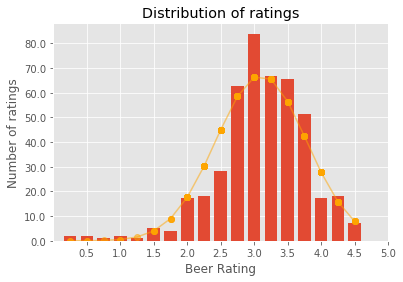

In [52]:
# let's create the histogram now
n_bins = np.linspace(0.125, 5.125, 21) # probably not most efficient way to create bins..
fit = norm.pdf(sorted(raw_scores), np.mean(raw_scores), np.std(raw_scores))

plt.hist(df.rating_score[df.rating_score.notnull()], bins=n_bins,
             align='mid', rwidth=.75, normed=True)
plt.plot(sorted(raw_scores),fit, '-o', alpha=0.5, color='orange', markeredgecolor='orange')

plt.xlim(0, 5)
plt.title('Distribution of ratings')
plt.xlabel('Beer Rating')
plt.ylabel('Number of ratings')

xlocs = np.linspace(0.5, 5.0, 10)
plt.xticks(xlocs, xlocs)

# i want to fix ylabels to show total number of rankings instead of normalized proportions 
# to do this, i'll set the labels 0-80 in intervals of 10 and work backwards to find their respective positions
ylocs_fixed = np.linspace(0, 80, 9)
ylocs = (ylocs_fixed / (len(df) * .25))
plt.yticks(ylocs, ylocs_fixed);

Next, let's create a simple boxplot. 

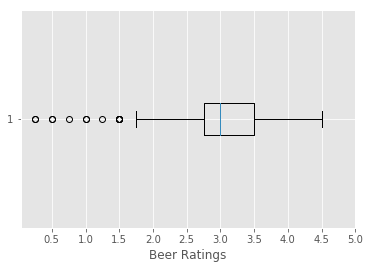

In [53]:
# let's visualize our boxplot
plt.boxplot(raw_scores, vert=False)
plt.xticks(xlocs, xlocs)
plt.xlabel('Beer Ratings');

The above boxplot visualizes the previous information regarding our `mean, quartiles`, and `outliers`. The relatively small box with the large whiskers show the concentration of the data in a small range (the `2.75-3.5 IQR`) while a sparse amount of data is spread outside the `IQR`, especially to the left. Last thing I want to do is view these two graphs matched up.

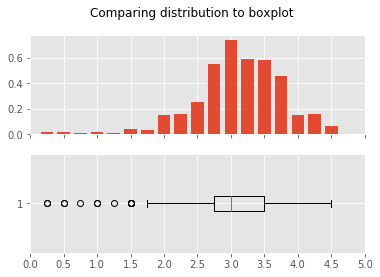

In [54]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].hist(df.rating_score[df.rating_score.notnull()], bins=n_bins,
             align='mid', rwidth=.75, normed=True)
axes[0].set_xlim(0, 5)
axes[0].set_xticks(np.linspace(0, 5, 11))
axes[1].boxplot(raw_scores, vert=False)
fig.suptitle('Comparing distribution to boxplot');

<a id="section_2"></a>

# 2. Beers Drank Over Time

<a id="section_2a"></a>

## a. The Statistics:

The next round of statistics we'll look at is beers drank over time. We can group it up into periods like yearly, monthly, weekly, etc., as well as individual days. I'm most interested in looking at the averages over different time periods, as well as highs and lows. Much as before, I want to look at the similar numbers regarding `measures of central tendency` and `measures of dispersion`. Let's start with...

### 1. Weekly Statistics

In [55]:
# first off, let's check the average beers and standard deviation per week...
avg_weekly = np.mean(df.week.value_counts())
std_weekly = np.std(df.week.value_counts())
print('The average beers drank per week is {:.2f} beers and the standard deviation is {:.2f} beers.'.format(
    avg_weekly, std_weekly))

The average beers drank per week is 5.90 beers and the standard deviation is 5.11 beers.


But wait! Any good statistician would see problem with this. The above caluculation only includes months and weeks that I *have* drank beers. It has no way of inherently knowing there were weeks I didn't drink beers. So what I want a TRUE average over the entire 2+ year period? First let's see *how many* weeks I never drank a beer, and then recalulate.

In [57]:
# how many weeks did I never drink a beer? (some sad weeks indeed)
# start with compiling a dict that has each week starting from 0-max as keys, and the values as beers drank (or 0)
week_counts = df.week.value_counts().sort_index()
week_dict = dict.fromkeys(np.linspace(df.week.min(), df.week.max(), (df.week.max() - df.week.min() + 1), dtype=int), 0)
for index, value in week_counts.iteritems():
    week_dict[index] = value


zero_beers = 0
total_weeks = len(week_dict)
for value in week_dict.values():
    if not value:
        zero_beers += 1
        
print('There were {} weeks (out of {} total) that I never drank a beer.'.format(zero_beers, total_weeks))

There were 39 weeks (out of 116 total) that I never drank a beer.


In [58]:
# now, let's recalculate the mean
true_avg_weekly = (sum(week_dict.values()) / len(week_dict))
true_std_weekly = np.std(list(week_dict.values()))
print('The true average weekly is {:.2f} beers per week, with a standard deviation of {:.2f} beers.'.format(
    true_avg_weekly, true_std_weekly))

The true average weekly is 3.91 beers per week, with a standard deviation of 5.01 beers.


As we can see, when we add those 39 beer-less weeks into our `mean` calculation it drives the average down by `5.90 - 3.91 = 1.99` thanks to the larger denominator of total weeks.

Last weekly stat I want is the week that I drank the *most beers total*.

In [111]:
# the week with the most check-ins; first, make sure there's only one week with max
week_max_list = df.week.value_counts()
if week_max_list.values[0] != week_max_list.values[1]:
    week_max_loc = df.created_at[df.week == week_max_list.index[0]].iloc[0]
    week_string = week_max_loc.strftime('%B %d, %Y')
    week_max = week_max_list.values[0]
    print('I drank the most beers during the week of {}, with {} total beers.'.format(
    week_string, week_max))
else:
    print('There were multiple max weeks! To be fixed...')

I drank the most beers during the week of November 24, 2015, with 26 total beers.


### Summary of Weekly Statistics

* So we've seen that throughout the 111 weeks I've been using Untappd, I've checked in at least one beer 76 weeks, with 35 weeks missing any sort of activity. 
* In those 111 weeks, the `mean` beers drank was `4.09` beers per week with a `std` of `5.03` beers. 
* Thus, from the knowledge of the z-table/standard normal distribution curve, we can assume that 68% of weeks I had between `-1 std` and `+1 std` of beers, or anything below `9.12` total beers. And the value of `-2 std` to `+2 std` should contain 95% of our values, which is roughly anything less than `14.15` beers per week.
* If we look at only the 76 weeks I drank a beer, the `mean` beers drank those weeks rises to `5.97` beers per week, and the `std` roughly stays the same around `5.08` beers.
* During the week of `November 24th, 2015`, I drank a total of `27` beers, which was my all-time high.

### 2. Monthly Statistics
Now let's look at some of the same stats, but per month!

In [109]:
# I'm assuming that - unlike weekly - I've never gone a full month without drinking at least one beer
avg_monthly = np.mean(df.month.value_counts())
std_monthly = np.std(df.month.value_counts())
print('The average beers drank per month is {:.2f} beers and the standard deviation is {:.2f} beers.'.format(avg_monthly, std_monthly))

The average beers drank per month is 17.46 beers and the standard deviation is 12.70 beers.


In [110]:
# and finally, the month with the most check-ins
month_max_loc = df.month.value_counts().sort_values(ascending=False).index[0]
month_max = df.month.value_counts().sort_values(ascending=False).values[0]

# same as above, must format month string
month_max_loc = df.created_at[df.month == month_max_loc].iloc[0]
month_string = month_max_loc.strftime('%B %Y')

print('I drank the most beers during the month of {} with {} total beers.'.format(month_string, month_max))

I drank the most beers during the month of July 2017 with 52 total beers.


### Summary of Monthly Statistics

* Each month had an `mean` of `17.46` beers and a `std` of `12.37` beers. Again, computing via the z-values, 68% of all months fall within the `5.09 - 29.83` range, and 95% of all months will have less than 42.2 check-ins.
* Our max month was `November, 2015`, with `48` beers total checked-in.

### 3. Misc. Time Stats

In [ ]:
# let's look at the day I checked in the most beers
max_day = df.created_at.dt.date.value_counts().sort_values(ascending=False).index[0]
max_day_beers = df.created_at.dt.date.value_counts().sort_values(ascending=False).values[0]
max_day_string = max_day.strftime('%B %d, %Y')

print('On {} I drank a whopping {} beers! Let\'s hope they were just samplers!'.format(max_day_string, max_day_beers))

In [ ]:
# how many days have one beer versus none?
days_w_beer = len(df.created_at.dt.date.value_counts())
days_total = df.created_at.dt.date.max() - df.created_at.dt.date.min()
days_wo_beer = days_total.days - days_w_beer # currently unused
print('Out of a total {} days using Untappd, I have had at least one beer {} days.'.format(
                                            days_total.days, days_w_beer))

<a id="section_2b"></a>

## b. The Visualization

Let's try creating a graph of beers drank *per week* since I started using Untappd. I'm not sure how this will look, but it's worth a shot!

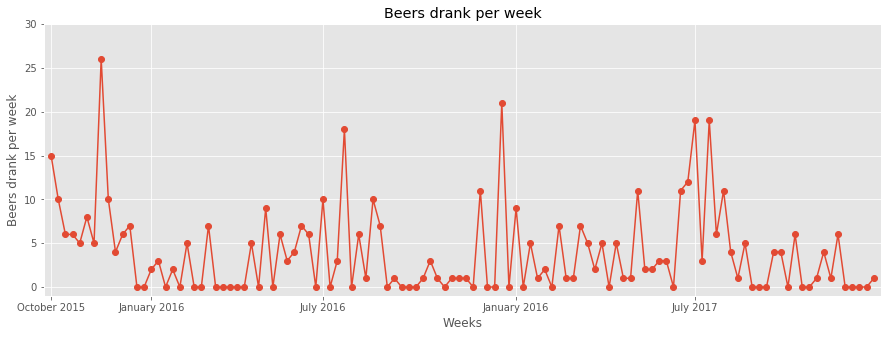

In [112]:
# create the xticks; because so many points exist on the X axis, I'll only label the start of each year for simplicity
### later, remove hard-coded ticks and make it smart - create separate function for this to reuse
xlocs_weeks = [0, 14, 38, 65, 90]
xlabels_weeks = ['October 2015', 'January 2016', 'July 2016', 'January 2016',  'July 2017']


# now let's create the plot with this dict
plt.figure(figsize=(15, 5))
plt.plot(list(week_dict.keys()), list(week_dict.values()), '-o')
plt.xlim(df.week.min() - 1, df.week.max() + 1)
plt.ylim(-1, max(week_dict.values()) + 3)
plt.title('Beers drank per week')
plt.xlabel('Weeks')
plt.ylabel('Beers drank per week')
plt.yticks(np.linspace(0, 30, 7)) # hardcoded
plt.xticks(xlocs_weeks, xlabels_weeks);

We can see now the graph starts out with some high values, as I was enrolled in a beer class at university when I started using Untappd. Other high points are the times when I've been home visiting my family - Christmastime, 2016, and summer 2017.

However, this graph is a bit cluttered and isn't super easy to read, so next up let's try to create bigger "bins" and look at beers drank per *month* instead.

In [113]:
# let's create the dataset of beers drank per month and sort it
month_counts = df.month.value_counts().sort_index()

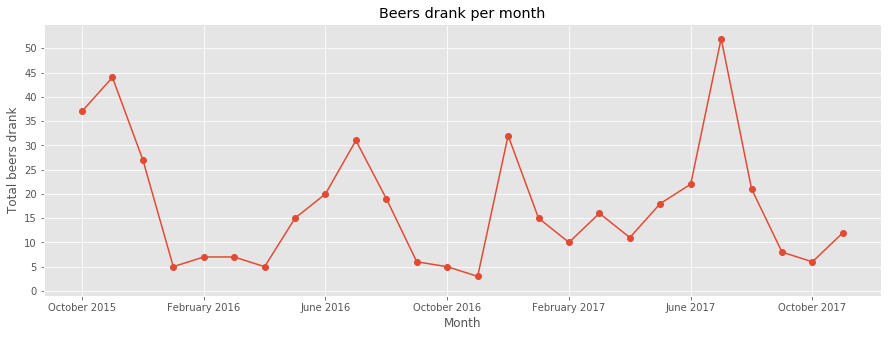

In [115]:
# create the xticks locations and labels
xlocs_months = np.linspace(10, 34, 7, dtype=int) #hardcoded
xlabels_months = []
for month_int in xlocs_months:
    xlabels_months.append(datetime(1900, ((month_int - 1) % 12 + 1), 1).strftime('%B') + 
                        ' ' + datetime((df.created_at.dt.year.min() + (1 * (month_int -1) // 12)), 1, 1).strftime('%Y'))

# now, make the plot
plt.figure(figsize=(15,5))
plt.plot(month_counts.index, month_counts.values, '-o')
plt.xticks(xlocs_months, xlabels_months)
plt.title('Beers drank per month')
plt.xlabel('Month')
plt.ylabel('Total beers drank')
plt.ylim(-1, 55) #hardcoded
plt.yticks(np.linspace(0, 50, 11)); #hardcoded

That looks a lot better! As I mentioned earlier, it's easy to see the first few months were among my highest ever. That's mainly due the beer history class I was taking in university, where we visited lots of breweries and had lots of beer samplings. And it's even easier to see my three other peaks are centered around the summers of 2016/2017 and Christmas 2016, while I tended to not drink lots of beers in months I was working or busy in school.

<a id="section_3"></a>

# 3. The Best and Worst Beer Styles

Next up, I want to analyze the different styles of beers I drink. Questions I want to answer include the following:

* Which styles do I drink the most?
* What's the distribution of all the beer styles I've ever drank?
* Which styles do I rate the highest and lowest overall?

I'll be primarily using the 'simple_style' category I created in Part 1: Data Munging.

In [116]:
# first, let's check the 5 styles that have the most checkins
styles = df.groupby('simple_style').size().sort_values(ascending=False)
styles.head(5)

simple_style
American IPA    102
Pale Ale         57
Sour             26
Imperial IPA     20
Cider            17
dtype: int64

I tried originally making a pie chart but it was way too cluttered - I've tried around 90 styles of beers, and many styles had only a handful of checkins. So I've plotted a bargraph that shows only my top 20 styles. Clearly my top 2 styles dominate compared to the rest!

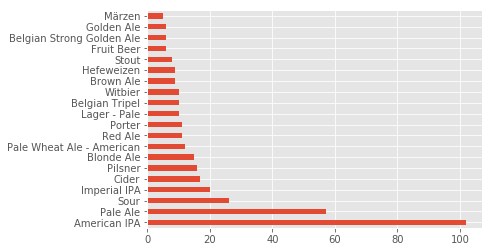

In [117]:
df.simple_style.value_counts()[:20].plot(kind='barh');

What if I pull just the top 4 syles (`American IPA, Pale Ale, Sour, Imperial IPA`) and check the individual distributions of ratings? I'll have to normalize the graphs so they're comparable.

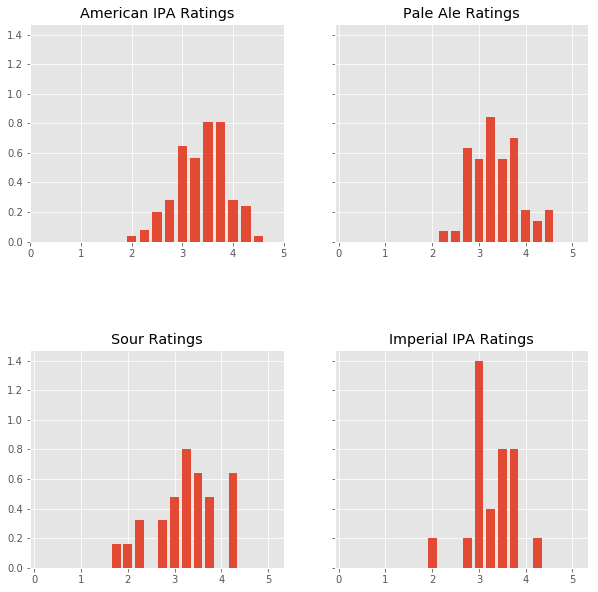

In [128]:
# first, pull relevant data from our dataframe and delete Null values
ipa_scores = df.rating_score[df.simple_style == 'American IPA']
ipa_scores = ipa_scores[ipa_scores.notnull()]
pale_scores = df.rating_score[df.simple_style == 'Pale Ale']
pale_scores = pale_scores[pale_scores.notnull()]
sour_scores = df.rating_score[df.simple_style == 'Sour']
sour_scores = sour_scores[sour_scores.notnull()]
imp_scores = df.rating_score[df.simple_style == 'Imperial IPA']
imp_scores = imp_scores[imp_scores.notnull()]


# now create the 4 subplots and adjust
# i dont want sharex=True because I want to see the xticks below each graph
xlocs = np.linspace(0, 5, 6)
fig, axes = plt.subplots(2, 2,  sharey='all', figsize=(10, 10))
axes[0, 0].hist(ipa_scores, normed=True, bins=n_bins, align='mid', rwidth=.75)
axes[0, 0].set_xlim(0, 5)
axes[0, 0].set_xticks(xlocs)
axes[0, 0].set_title('American IPA Ratings')
axes[0, 1].hist(pale_scores, normed=True, bins=n_bins, align='mid', rwidth=.75)
axes[0, 1].set_xticks(xlocs)
axes[0, 1].set_title('Pale Ale Ratings')
axes[1, 0].hist(sour_scores, normed=True, bins=n_bins, align='mid', rwidth=.75)
axes[1, 0].set_xticks(xlocs)
axes[1, 0].set_title('Sour Ratings')
axes[1, 1].hist(imp_scores, normed=True, bins=n_bins, align='mid', rwidth=.75)
axes[1, 1].set_xticks(xlocs)
axes[1, 1].set_title('Imperial IPA Ratings')
fig.subplots_adjust(hspace=0.5);

So far, we've only seen which beer styles I drink the most. What about the styles with the best average ratings?

When looking at the styles with the highest and lowest average ratings, I've got to filter them to include a minimum number of check-ins, otherwise a style that I've only drank once or twice could come off as the winner (or loser) with an unfair sample size. For example, left unfiltered, this happens:

* my top style is `Bière de Champagne`, which I've had exactly once (although to be fair, it was *really* good)

Thus, I need to choose a cutoff point. It's really arbitrary, but I'm choosing 5 beers. A round number, I figure by the time I've had 5 different beers of `X` style I can fairly determing if I like it enough. I'm sure theres a formula out there in the statistical universe to calculate what the cutoff point should be with a given sample size, but I'm not sure what that formula is! So we'll do 5.

In [129]:
# best/worst styles, minimum of 5 beers drank
filtered_styles = df.groupby('simple_style').filter(lambda x: x.simple_style.value_counts() >= 5)
style_bw = filtered_styles.groupby('simple_style').rating_score.mean().sort_values(ascending=False)

In [132]:
df[df.simple_style == 'Kölsch']

,beer_name,brewery_name,beer_type,simple_style,beer_abv,beer_ibu,venue_name,venue_city,venue_state,venue_country,venue_lat,venue_lng,rating_score,created_at,brewery_country,brewery_city,brewery_state,week,month
40,Speed Bump,Fifty West Brewing Company,Kölsch,Kölsch,5.25,25,The Brass Tap,Cincinnati,OH,United States,39.1284,-84.51730,2.25,2015-11-03 16:12:26,United States,Cincinnati,OH,4,11
57,Vacation Kölsch®,Daredevil Brewing Co,Kölsch,Kölsch,5.00,20,Daredevil Brewing Co.,Speedway,IN,United States,39.7827,-86.24070,3.25,2015-11-27 15:24:38,United States,Speedway,IN,7,11
95,Lift,MadTree Brewing Company,Kölsch,Kölsch,4.70,11,Views on Vine,Clifton,OH,United States,39.1325,-84.50960,3.50,2015-12-17 23:59:47,United States,Cincinnati,OH,10,12
213,Gaffel Kölsch,Privatbrauerei Gaffel Becker,Kölsch,Kölsch,4.80,0,Altstadt,Köln,Nordrhein-Westfalen,Deutschland,50.9392,6.95704,3.75,2016-08-25 14:36:38,Germany,Köln,Köln,45,20
451,Mangö,Clown Shoes,Kölsch,Kölsch,6.00,25,Taproom,Madrid,Madrid,España,40.4362,-3.71304,4.50,2017-11-24 20:12:29,United States,Ipswich,MA,110,35


In [130]:
# top 3 styles, minimum of x beers drank
style_bw.head(5)

simple_style
Kölsch                       3.450000
American IPA                 3.381313
Pale Ale                     3.368421
Pale Wheat Ale - American    3.333333
Imperial IPA                 3.275000
Name: rating_score, dtype: float64

In [131]:
# worst 3 styles, average rating, minimum of x beers drank
style_bw.tail(5)

simple_style
Stout                             2.75
Lager - Pale                      2.65
Märzen                            2.60
Lager - North American Adjunct    1.80
Lager - American Light            0.95
Name: rating_score, dtype: float64

## Summary

So what did we just see?

* We first saw that I've drank `American IPAs` and `Pale Ales` most, and by a significant margin. After those two, the styles that rounded out the top 5 most drank styles were `Sours`, `Imperial IPAs`, and `Ciders`.
* Looking at the highest-rated styles (min. 5 beers), `Kölschs` led the pack. `American IPAs`, `Pale Ales`, `Pale Wheat Ales`, and `Imperial IPas` rounded out the rest of the top 5.
* The worst styles on average were `Stouts`, `Pale Lagers`, `Märzens`, and `American Lagers`.

For the most part, this isn't super surprising to me. Three of my five most drank styles were also in the top 5 ranked, which shows I tend to stick to styles I like. On the other end of the spectrum, darker beers like `Stouts` I don't usually like, so I'll stay away from them picking beers. And also unsurprisingly, the worst 2 styles were the traditional "garbage beer" styles that include Budweiser, PBR, and the like.

The two surprising facts were:
* how high on average I rate `Imperial IPAs`. I tend to not like them (at least in my mind) as they're usually very hoppy, but apparently that's not been the case!
* `Kölsch` winning the highest-rated style. Granted, I've only had *exactly* five, which was our cutoff point, and one of those beers is tied for my highest-rated ever, as we will see soon.

<a id="section_4"></a>

## 4. Breweries and Beers: Miscellaneous Statistics

Next information I'm interested in is about breweries and individual beers:

* Which breweries have I drank the most (unique) beers from?
* Which breweries have the highest and lowest average ratings?
* Which breweries have the biggest range between their highest and lowest ratings, and which are the most consistent?
* Which beers have the highest rating? Which have the lowest?

Again, like the previous section, I need to choose a cutoff for breweries. I arbitrarily chose 3, as 5 knocked out all the breweries except 20 or so, which seemed too small a sample size.

In [133]:
# top 5 breweries by total beers drank
df.brewery_name.value_counts().head(5)

MadTree Brewing Company     16
Sun King Brewing Company    16
Upland Brewing Company      11
Rhinegeist Brewery          11
The Tap Brewery             11
Name: brewery_name, dtype: int64

In [134]:
# best/worst breweries, min x beers
filtered_brewery = df.groupby('brewery_name').filter(lambda x: x.brewery_name.value_counts() >= 3)
brewery_bw = filtered_brewery.groupby('brewery_name').rating_score.mean().sort_values(ascending=False)

In [135]:
# top 5 breweries
brewery_bw.head(5)

brewery_name
To Øl                                     3.6875
Taft's Brewing Company                    3.6250
3 Floyds Brewing Company                  3.5625
Cervezas La Virgen                        3.5625
Against the Grain Brewery & Smokehouse    3.5000
Name: rating_score, dtype: float64

In [136]:
# worst 5 breweries - expanded to ignore the "garbage beer" breweries at the very bottom
brewery_bw.tail(8)

brewery_name
Mt. Carmel Brewing Company     2.750000
Angry Orchard Cider Company    2.718750
Founders Brewing Co.           2.687500
Great Flood Brewing Company    2.687500
Fifty West Brewing Company     2.678571
Grupo Damm                     2.333333
Grupo Mahou-San Miguel         1.937500
Anheuser-Busch                 0.937500
Name: rating_score, dtype: float64

In [137]:
# what beers have I drank from To Øl? I can't remember
df[df.brewery_name == 'To Øl']

,beer_name,brewery_name,beer_type,simple_style,beer_abv,beer_ibu,venue_name,venue_city,venue_state,venue_country,venue_lat,venue_lng,rating_score,created_at,brewery_country,brewery_city,brewery_state,week,month
280,Dangerously Close To Stupid,To Øl,IPA - Imperial / Double,Imperial IPA,9.3,100,Taproom,Madrid,Madrid,España,40.4362,-3.71304,4.25,2017-02-07 22:24:55,Denmark,København N,Region Hovedstaden,69,26
299,Shock Series: !!PA Citra & Galaxy,To Øl,IPA - Imperial / Double,Imperial IPA,9.0,0,Irreale,Madrid,Madrid,España,40.4288,-3.70456,3.25,2017-03-23 22:19:47,Denmark,København N,Region Hovedstaden,75,27
302,Shock Series: !PA Equinox,To Øl,IPA - American,American IPA,7.0,0,Taproom,Madrid,Madrid,España,40.4362,-3.71304,3.00,2017-03-28 23:08:20,Denmark,København N,Region Hovedstaden,76,27
306,Surt Til Hibiscus & Cranberry,To Øl,Sour - Ale,Sour,5.0,0,Taproom,Madrid,Madrid,España,40.4362,-3.71304,4.25,2017-04-06 23:58:30,Denmark,København N,Region Hovedstaden,77,28


### Top breweries:

This was a lot more interesting to me than the previous section on styles. 

* My top brewery is European! `To Øl` is Danish, and apparently I've loved their beers! I was curious which beers were from `To Øl` so I checked and found I've had 4 - three different `IPAs` and a `Hibiscus and Cranberry Sour`, which I remembered *loving*. 

* `Taft's Alehouse` is the only Cincinnati-based brewery in my top 5, and I *do* love their beers as well as the brewhouse itself - it's built inside an old church! Definitely a well-deserved second place.

* `3 Floyds`, maker of the famous `Zombie Dust` is the least surprising of the five, with their beers usually being top-notch.

* The fourth-placed `Cervezas La Virgen` is based here out of Madrid. One of the first Spanish craft breweries I discovered upon moving here, I instantly fell in love with their IPA, Pale Ale, and Pumpkin Beer, and have since tried quite a few more.

* Louisville's `Against the Grain` is another really good brewery that nonetheless surprised me when it appeared fifth.

### Worst breweries:

On the other end of the scale, no surprise that the worst breweries tend to include your large-scale macrobreweries like `Anheuser-Busch`, `Grupo Damm` and `Grupo Mahou-San Miguel`. (Those last two are the Spanish equivalents of Budweiser, basically). However, once I started searching for the worst *craft breweries* I didn't know what to expect. 

* We ended up finding `Fifty West`, `Great Flood`, and `The Tap` among them - all local (ish) Cincinnati/Indianapolis/Louisiville breweries.
* I was a bit surprised to find the famous `Founders Brewing Co.` in the bottom, as I can't remember overly disliking their beers. 
* Finally, less surprising was finding `Angry Orchard` in the bottom - while I loved them a few years ago, I've thankfully outgrown those sweet...ciders? Beers? (can you even call them that? They're technically not even ciders...)

### An interesting note on duplicates:

Remember in Part 1 when I decided to remove duplicates? Initially I was keeping the first copy of any beer and then deleting the rest, but I later realized that my rankings have changed over time for some beers. So I went back and changed the code to keep the *last* occurance of any beer, to preserve the most current ranking of beers, and it significantly changed the top breweries. (The bad ones stayed bad, however.) It also slightly changed my top beers, which we look at next.

In [ ]:
# now, consistency among breweries


Now, the final statistics. Let's see which beer(s) are the top! I'll find out the highest score and then check out the beers. And afterwards, which beers are the absolute worst? This ought to be fun!

In [138]:
# top beers
top_score = df.rating_score.max()
print('The highest rating is a {} out of 5.'.format(top_score))

The highest rating is a 4.5 out of 5.


In [139]:
df[['beer_name', 'simple_style', 'brewery_name', 'brewery_country']][df.rating_score == top_score]

,beer_name,simple_style,brewery_name,brewery_country
207,Cuvée Spéciale 800 Ans,Blonde Ale,Brasserie de l'Abbaye du Val-Dieu,Belgium
252,Citradelic: Tangerine IPA,American IPA,New Belgium Brewing Company,United States
264,Pale Ale Citra,Pale Ale,Brouwerij Kees,Netherlands
331,Lupulus Hopera,Pale Ale,Brasserie Lupulus,Belgium
336,Orval,Pale Ale,Brasserie d'Orval,Belgium
389,Passion Fruit Kicker,Fruit Beer,Green Flash Brewing Company,United States
451,Mangö,Kölsch,Clown Shoes,United States


In [13]:
# where's my favorite beer at?!
df[['beer_name', 'brewery_name', 'rating_score']][(df.brewery_name.str.contains('Arcadia')) & (df.beer_name.str.startswith('IPA'))]

,beer_name,brewery_name,rating_score
412,IPA (India Pale Ale),Arcadia Brewing Company,4.25


### Top beers

* Not surprisingly, almost half of the beers that share the highest rating are Belgian. When people typically ask me what my 'favorite beer' is, `Orval` is one of the two beers I typically mention. 
* Interestingly enough, the other beer I consider my 'go-to favorite' isn't on the list of highest-rated beers, so I checked and found it's got a `4.25`. It just missed the cut!
* I tend to **love** beers with a citrus taste to them, which is easily spotted here. `Green Flash's Passion Fruit Kicker`, `New Belgium's Tangerine IPA` and `Clown Shoes' Mango-flavored Kölsch` are all beers on the top that I would agree belong there.

Next up, it probably won't be that surprising, but let's look at the worst beers...

In [142]:
worst_score = df.rating_score.min()
print('The worst beer got a {}. Ouch!'.format(worst_score))

The worst beer got a 0.25. Ouch!


And the award for worst beer goes to...

In [143]:
df[['beer_name', 'simple_style', 'brewery_name', 'brewery_country']][df.rating_score == worst_score]

,beer_name,simple_style,brewery_name,brewery_country
14,Natural Light,Lager - American Light,Anheuser-Busch,United States
225,Alemana,Lager - Euro Strong,Carrefour,France


Ding ding ding, we have a winner! No wait, what's that? We...we have a TIE! Our worst beers are `Natty Light` and `Carrefour Lager`. Very different, distinct tastes, however. `Natty Light` just tastes like water, so it can hardly be considered beer, while I would definitely reccommend `Carrefour Lager` as the actual worst-tasting beer I've *ever* had. Leave it to a European supermarket's awful store-brand beer to take the award!

What other beers have bad ratings? This is fun, let's keep going...

In [144]:
# remember from above that beers below 2.0 are very rare, so let's use that as a cutoff point
df[['beer_name', 'rating_score', 'simple_style', 'brewery_name', 'brewery_country']][df.rating_score < 2].sort_values('rating_score')

,beer_name,rating_score,simple_style,brewery_name,brewery_country
14,Natural Light,0.25,Lager - American Light,Anheuser-Busch,United States
225,Alemana,0.25,Lager - Euro Strong,Carrefour,France
146,Bud Light,0.50,Lager - American Light,Anheuser-Busch,United States
145,Miller Lite,0.50,Pilsner,Miller Brewing Company,United States
34,Pabst Blue Ribbon,0.75,Lager - North American Adjunct,Pabst Brewing Company,United States
144,Coors Light,1.00,Lager - American Light,Coors Brewing Company,United States
291,Estrella Galicia,1.00,Lager - North American Adjunct,Hijos de Rivera,Spain
138,Thai Chili Wahoo,1.25,Spiced / Herbed Beer,Ballast Point Brewing Company,United States
364,Budweiser,1.50,Lager - North American Adjunct,Anheuser-Busch,United States
35,Bud Light Platinum,1.50,Lager - American Light,Anheuser-Busch,United States


Now that's more like it! There's room on the podium for everyone today. We can see other garbage beers making an appearance here, including:

* `Bud Light`
* `Miller Lite`
* `PBR`
* `Coors Light`
* `Estrella Galicia`
* `Budweiser`
* `Bud Platinum`
* `San Miguel`
* `Turia`

Interestingly enough, a few of the worst beers are craft beers. `Upland`, `MadTree`, `Founders`, and `The Tap` were all unfortunate enough to make it with a beer here.

And - for my father, if he's reading this - the legendary `Ballast Point` even made an appearance with their Spiced Thai Beer. That was a day my father and I will never forget, and not for good reasons either...

<a id="section_5"></a>

# 5. Future plans?

This is an ongoing project that I'm not entirely done with. I wanted to get the basics done and posted online for others to see, but I'm going to continue working on it in the upcoming months. Here's some future plans I have:

* Clean up some existing code, namely the weekly/monthly sections. I need to fix two main issues there:
    * Correct a slight formatting issue with the datetime string showing the start of the week, not the first day that occurred
    * Fix the code in case two weeks/two months have the same max value. Didn't occur for me right now, but could occur in the future or for another person's data
    
* Fix some hardcoded spots. Especially on graphs, lots of the limits and parameters were hardcoded based on what I observed in the data. However, if I ever updated the .csv file, that won't work anymore. Additionally, if others want to use my code for their own data, it won't work in certain spots, so let's try making that all dynamic.
* Add new analyses. I didn't look at any graphs plotting correlation. Early on, I had created graphs that compared the average beer ranking to both ABV and IBU ratings, but commented it out (below) as it wasn't super useful in it's current form. I want to consider other ways to compare data though, such as rating of beers drank by time of day, or so on. 

In [145]:
# plotting average ABV by ratings, no correlation observed
#plt.plot(df.groupby('rating_score').beer_abv.mean())
#plt.title('Average ABV by rating')
#plt.xlabel('Rating')
#plt.ylabel('Average ABV (%)');

In [ ]:
# comparing average IBU to ratings shows a positive correlation
# beers that I rate higher tend to have higher IBUs
#plt.plot(df.groupby('rating_score').beer_ibu.mean())
#plt.title('Average IBU by rating')
#plt.xlabel('Rating')
#plt.ylabel('Average IBUs');